[[58.36039191 14.92059243 26.61095777]
 [94.01725152 64.72471246  3.76334133]]
Les 10 premières entrées de X : [[ 56  18  27]
 [ 81  57   3]
 [ 25   9  11]
 [ 20  13  30]
 [ 27  13  13]
 [ 18  46   7]
 [ 12   3   1]
 [ 21  20   2]
 [109   1   6]]
Nombre d'apparitions : 
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]



Text(0.5, 0, 'Valeur')

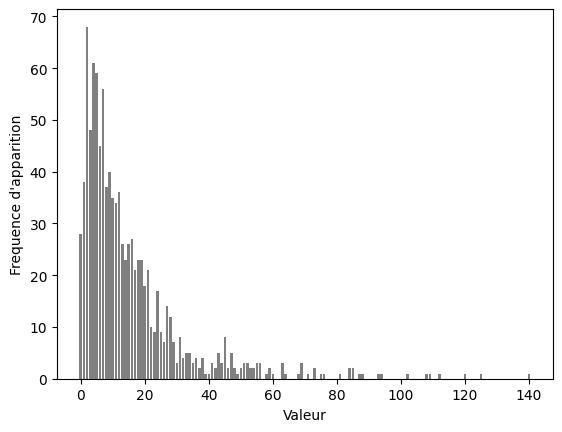

In [55]:
%matplotlib inline
# Les modèles linéaires et les réseaux de neurones sont sensibles à l'échelle et à la distribution des 
# caractéristiques ainsi qu'aux liaisons entre entrées et sorties.
# Les modèles linéaires fonctionnent mieux lorsque les caractéristiques suivent une gaussienne. On utilise
# les fonctions mathématiques log ou exp pour parvenir.

import numpy as np
import matplotlib.pyplot as plt

rnd = np.random.RandomState(0)
# On construit un vecteur de 3 caractéristiques dans 1000 échantillons
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)
# Mais on ne considère pas le vecteur caractéristique tel quel, on va prendre une distribution de Poisson
X = rnd.poisson(10*np.exp(X_org))
# On construit une sortie comme produit scalaires des caractéristiques avec 
# un vecteur obtenu par distribution normale
y = np.dot(X_org,w)

print("{}".format((10*np.exp(X_org))[0:2]))
print("Les 10 premières entrées de X : {}".format(X[0:9]))

# En comptant le nombre d'apparition des entiers 0,1,2, ... dans la première caractéristiques
bins = np.bincount(X[:,0])
print("Nombre d'apparitions : \n{}".format(bins))

print()
# En dessinant : 
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Frequence d'apparition")
plt.xlabel("Valeur")

In [58]:
# En essayant une régression ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=0)
score = Ridge().fit(X_train,y_train).score(X_test,y_test)
print("Score : {:.3f}".format(score))

Score : 0.622


Score : 0.875


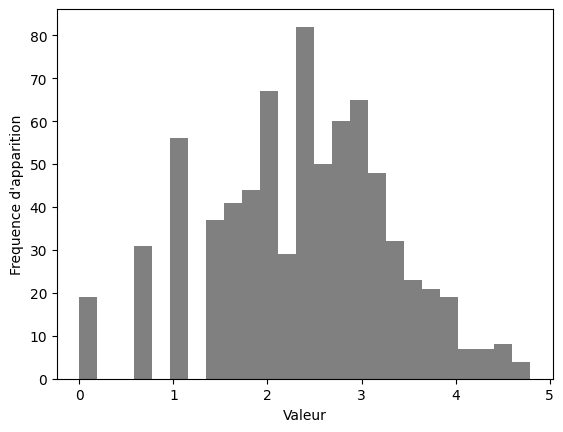

In [67]:
# En transformant les données en utilisant un log ( avec changement de variable, la valeur 0 existe dans les données)
X_train_log = np.log(X_train+1)
X_test_log = np.log(X_test+1)

plt.hist(X_train_log[:,0],bins=25,color='grey')
plt.ylabel("Frequence d'apparition")
plt.xlabel("Valeur")

# Soit un score avec ridge de :

score = Ridge().fit(X_train_log,y_train).score(X_test_log,y_test)
print("Score : {:.3f}".format(score))